In [1]:
# importing required librabries
import pandas as pd
import seaborn as sns
import matplotlib .pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import matplotlib.style as style# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv('train_data.csv')
data.head()


,ID,date,Item Id,Item Name,ad_spend,anarix_id,units,unit_price
0,2022-04-12_B09KDTS4DC,2022-04-12,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",NaN,NAPQUEEN,0.0,0.0
1,2022-04-12_B09MR2MLZH,2022-04-12,B09MR2MLZH,NapQueen 12 Inch Bamboo Charcoal Queen Size Me...,NaN,NAPQUEEN,0.0,0.0
2,2022-04-12_B09KSYL73R,2022-04-12,B09KSYL73R,"NapQueen Elsa 8"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0
3,2022-04-12_B09KT5HMNY,2022-04-12,B09KT5HMNY,"NapQueen Elsa 6"" Innerspring Mattress, Twin",NaN,NAPQUEEN,0.0,0.0
4,2022-04-12_B09KTF8ZDQ,2022-04-12,B09KTF8ZDQ,"NapQueen Elsa 6"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101490 entries, 0 to 101489
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          101490 non-null  object 
 1   date        101490 non-null  object 
 2   Item Id     101488 non-null  object 
 3   Item Name   99658 non-null   object 
 4   ad_spend    77303 non-null   float64
 5   anarix_id   101490 non-null  object 
 6   units       83592 non-null   float64
 7   unit_price  101490 non-null  float64
dtypes: float64(3), object(5)
memory usage: 6.2+ MB


In [4]:
data['date'] = pd.to_datetime(data['date'])
data.isnull().sum()

ID                0
date              0
Item Id           2
Item Name      1832
ad_spend      24187
anarix_id         0
units         17898
unit_price        0
dtype: int64

In [6]:
data.index

RangeIndex(start=0, stop=101490, step=1)

## EDA

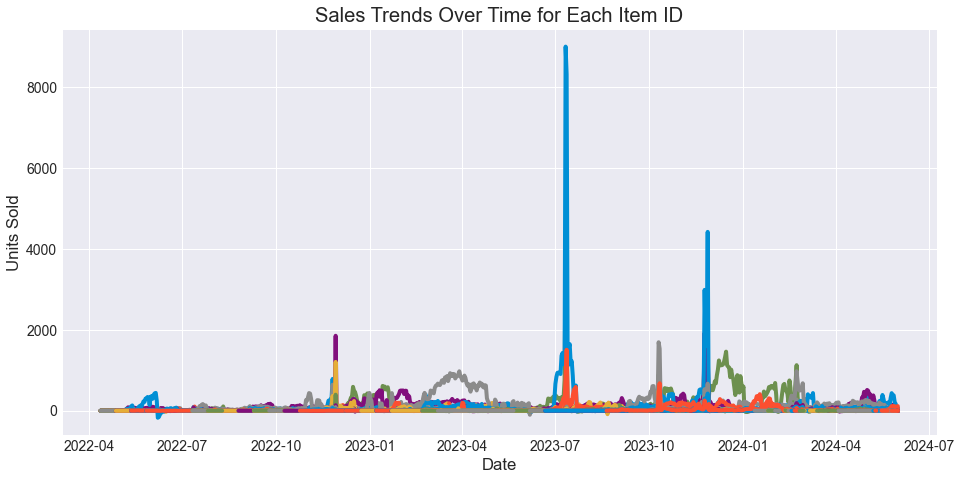

In [37]:
unique_item_ids = data['Item Id'].unique()

plt.figure(figsize=(14, 7))
for item_id in unique_item_ids:
    item_data = data[data['Item Id'] == item_id]
    plt.plot(item_data['date'], item_data['units'], label=f'Item {item_id}')
plt.title('Sales Trends Over Time for Each Item ID')
plt.xlabel('Date')
plt.ylabel('Units Sold')

plt.show()

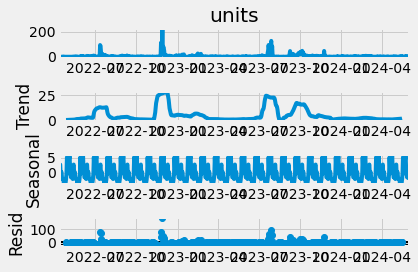

In [14]:
item_data = data[data['Item Id'] == unique_item_ids[0]]
item_data.set_index('date', inplace=True)
item_data = item_data.resample('D').sum()
result = seasonal_decompose(item_data['units'].dropna(), model='additive', period=30)
result.plot()
plt.show()

### Daily Seasonality

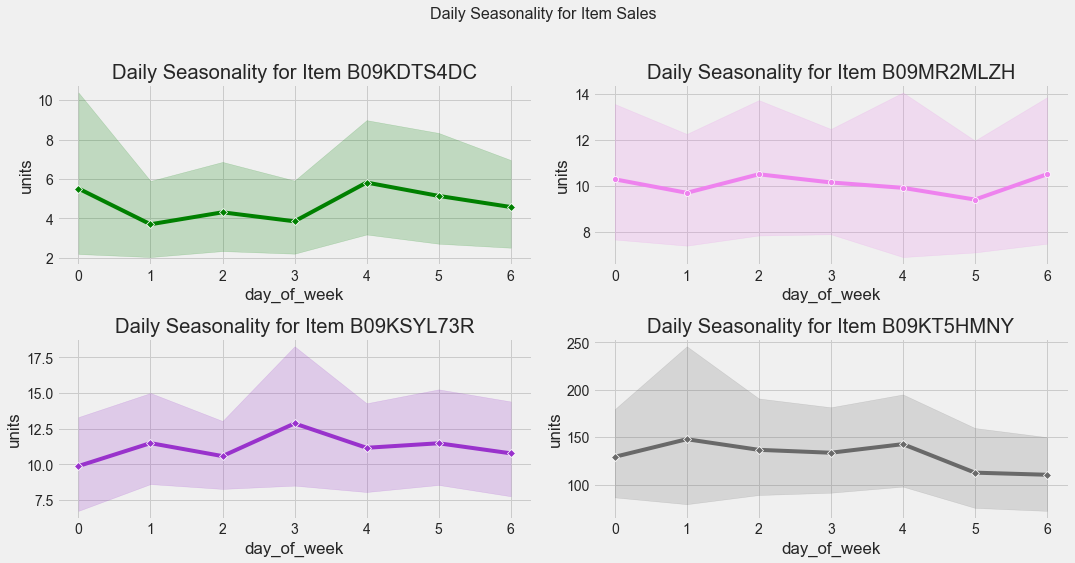

In [38]:
data['date'] = pd.to_datetime(data['date'])
# Extract day of the week for daily seasonality analysis
data['day_of_week'] = data['date'].dt.dayofweek

plt.style.use("fivethirtyeight")

fig, axs = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(15, 8))
fig.suptitle("Daily Seasonality for Item Sales", fontsize=16)

item_ids = data['Item Id'].unique()[:4]  # Assuming there are at least 4 unique item IDs

sns.lineplot(data=data[data['Item Id'] == item_ids[0]], x='day_of_week', y='units', ax=axs[0, 0], marker='D', color='green')
axs[0, 0].set_title(f'Daily Seasonality for Item {item_ids[0]}')

sns.lineplot(data=data[data['Item Id'] == item_ids[1]], x='day_of_week', y='units', ax=axs[0, 1], marker='o', color='violet')
axs[0, 1].set_title(f'Daily Seasonality for Item {item_ids[1]}')

sns.lineplot(data=data[data['Item Id'] == item_ids[2]], x='day_of_week', y='units', ax=axs[1, 0], marker='D', color='darkorchid')
axs[1, 0].set_title(f'Daily Seasonality for Item {item_ids[2]}')

sns.lineplot(data=data[data['Item Id'] == item_ids[3]], x='day_of_week', y='units', ax=axs[1, 1], marker='D', color='dimgray')
axs[1, 1].set_title(f'Daily Seasonality for Item {item_ids[3]}')

sns.set_style("darkgrid")

fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

### Weekly Seasonality

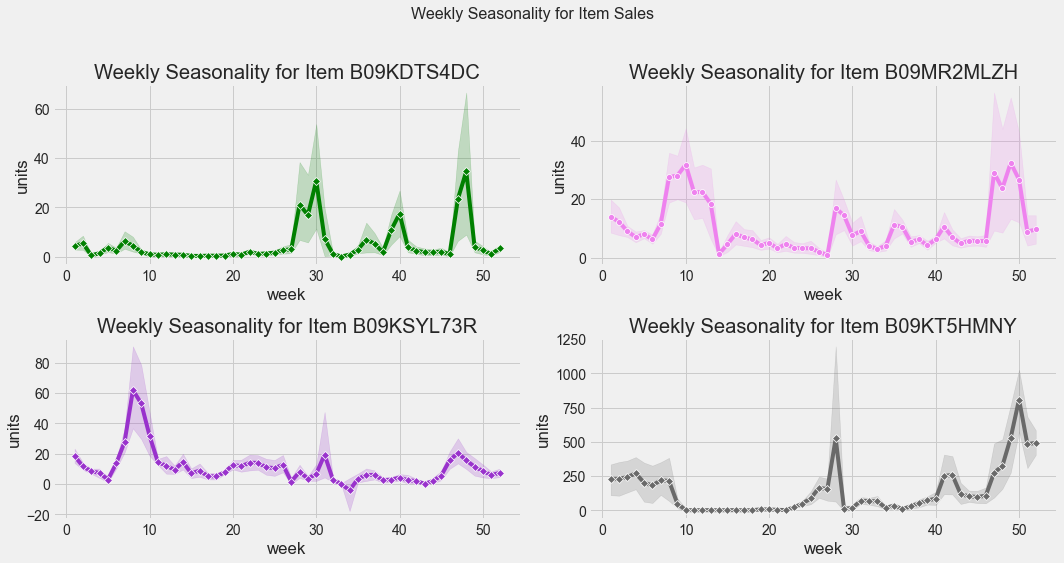

In [41]:
data['date'] = pd.to_datetime(data['date'])
data['week'] = data['date'].dt.isocalendar().week

plt.style.use("fivethirtyeight")

fig, axs = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(15, 8))
fig.suptitle("Weekly Seasonality for Item Sales", fontsize=16)

item_ids = data['Item Id'].unique()[:4]  # Assuming there are at least 4 unique item IDs

sns.lineplot(data=data[data['Item Id'] == item_ids[0]], x='week', y='units', ax=axs[0, 0], marker='D', color='green')
axs[0, 0].set_title(f'Weekly Seasonality for Item {item_ids[0]}')

sns.lineplot(data=data[data['Item Id'] == item_ids[1]], x='week', y='units', ax=axs[0, 1], marker='o', color='violet')
axs[0, 1].set_title(f'Weekly Seasonality for Item {item_ids[1]}')

sns.lineplot(data=data[data['Item Id'] == item_ids[2]], x='week', y='units', ax=axs[1, 0], marker='D', color='darkorchid')
axs[1, 0].set_title(f'Weekly Seasonality for Item {item_ids[2]}')

sns.lineplot(data=data[data['Item Id'] == item_ids[3]], x='week', y='units', ax=axs[1, 1], marker='D', color='dimgray')
axs[1, 1].set_title(f'Weekly Seasonality for Item {item_ids[3]}')

sns.set_style("darkgrid")


fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

### Monthly Seasonality

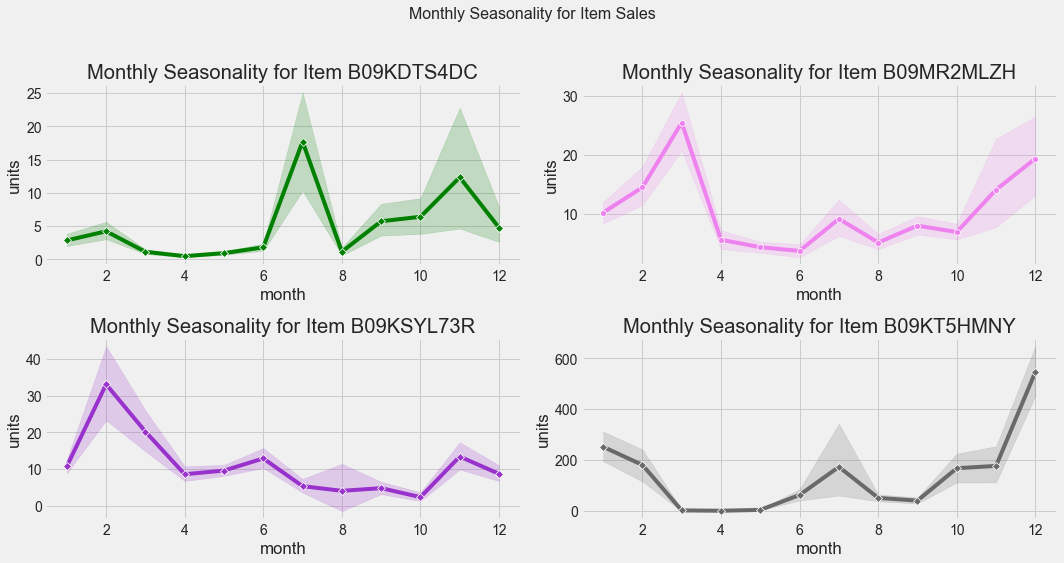

In [42]:
data['month'] = data['date'].dt.month

plt.style.use("fivethirtyeight")

fig, axs = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(15, 8))
fig.suptitle("Monthly Seasonality for Item Sales", fontsize=16)

item_ids = data['Item Id'].unique()[:4]  # Assuming there are at least 4 unique item IDs

sns.lineplot(data=data[data['Item Id'] == item_ids[0]], x='month', y='units', ax=axs[0, 0], marker='D', color='green')
axs[0, 0].set_title(f'Monthly Seasonality for Item {item_ids[0]}')

sns.lineplot(data=data[data['Item Id'] == item_ids[1]], x='month', y='units', ax=axs[0, 1], marker='o', color='violet')
axs[0, 1].set_title(f'Monthly Seasonality for Item {item_ids[1]}')

sns.lineplot(data=data[data['Item Id'] == item_ids[2]], x='month', y='units', ax=axs[1, 0], marker='D', color='darkorchid')
axs[1, 0].set_title(f'Monthly Seasonality for Item {item_ids[2]}')

sns.lineplot(data=data[data['Item Id'] == item_ids[3]], x='month', y='units', ax=axs[1, 1], marker='D', color='dimgray')
axs[1, 1].set_title(f'Monthly Seasonality for Item {item_ids[3]}')

# Set the style
sns.set_style("darkgrid")

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

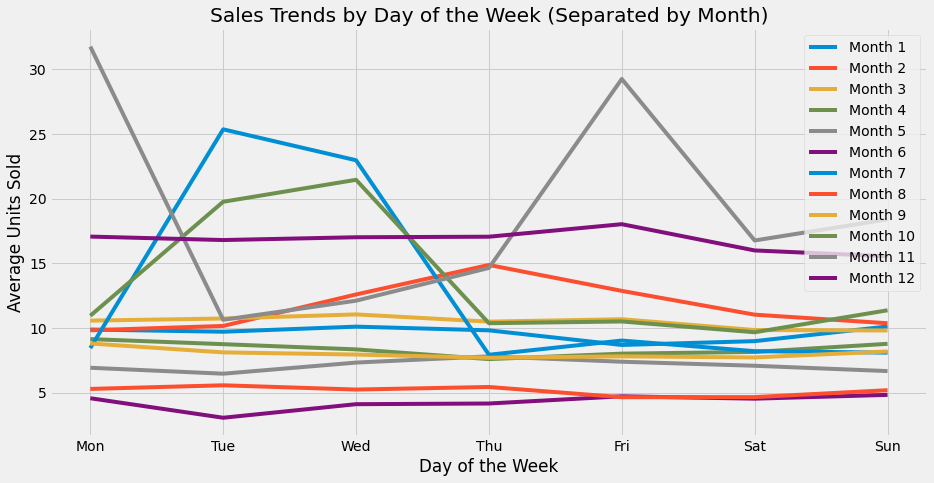

In [32]:
# EDA: Sales Trends by Day of the Week separated by Month
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month

plt.figure(figsize=(14, 7))
for month in range(1, 13):
    monthly_data = data[data['month'] == month]
    avg_sales_by_day = monthly_data.groupby('day_of_week')['units'].mean()
    plt.plot(avg_sales_by_day.index, avg_sales_by_day.values, label=f'Month {month}')
plt.title('Sales Trends by Day of the Week (Separated by Month)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Units Sold')
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

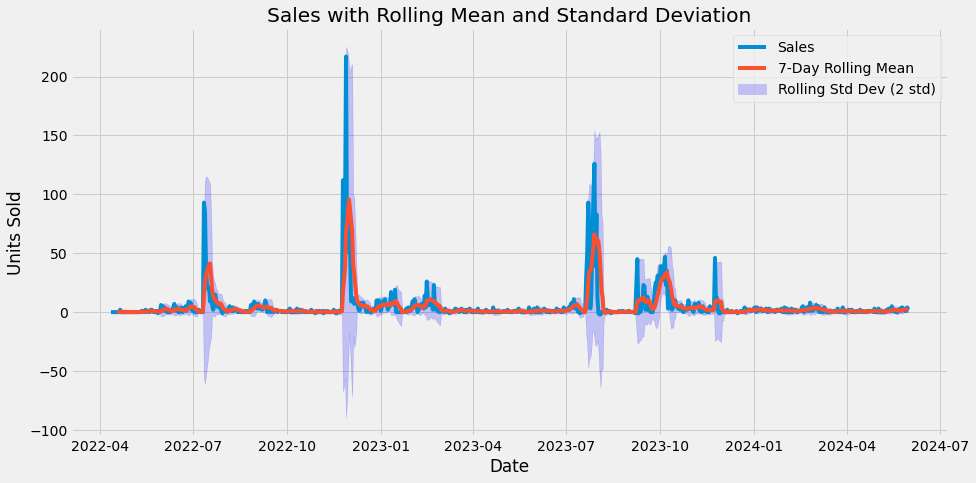

In [34]:

item_data = data[data['Item Id'] == data['Item Id'].unique()[0]]
item_data.set_index('date', inplace=True)
item_data = item_data.resample('D').sum()
item_data['rolling_mean_7'] = item_data['units'].rolling(window=7).mean()
item_data['rolling_std_7'] = item_data['units'].rolling(window=7).std()

plt.figure(figsize=(14, 7))
plt.plot(item_data.index, item_data['units'], label='Sales')
plt.plot(item_data.index, item_data['rolling_mean_7'], label='7-Day Rolling Mean')
plt.fill_between(item_data.index, 
                 item_data['rolling_mean_7'] - 2 * item_data['rolling_std_7'], 
                 item_data['rolling_mean_7'] + 2 * item_data['rolling_std_7'], 
                 color='b', alpha=0.2, label='Rolling Std Dev (2 std)')
plt.title('Sales with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

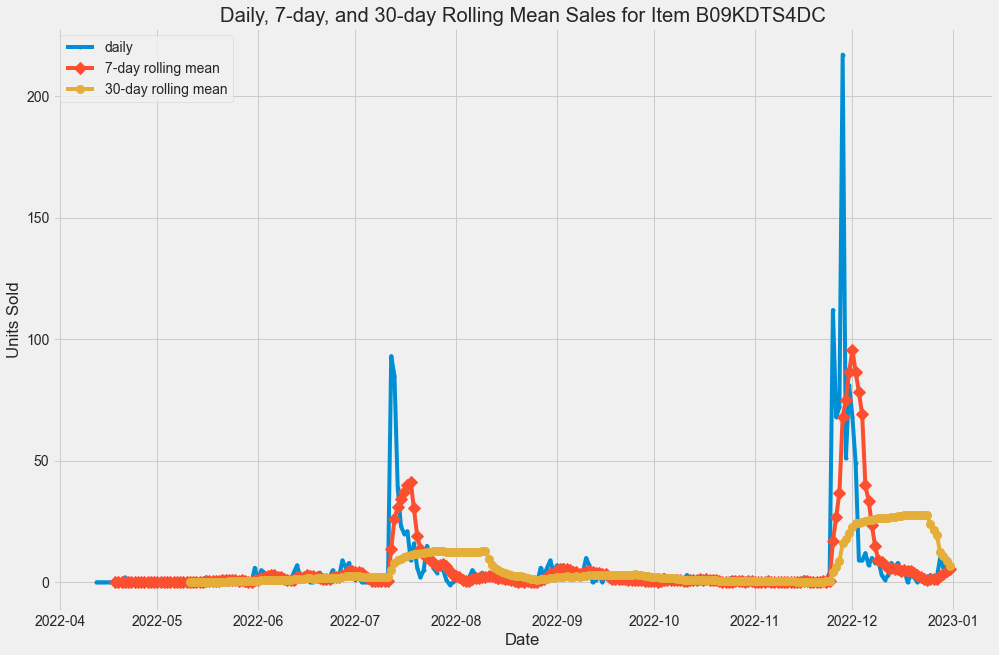

In [49]:
data['date'] = pd.to_datetime(data['date'])

# Set the item ID to analyze
item_id = data['Item Id'].unique()[0]  # Change to the specific item ID you want to analyze

item_data = data[data['Item Id'] == item_id]

item_data.set_index('date', inplace=True)

item_data['7_day_rolling'] = item_data['units'].rolling(window=7).mean()
item_data['30_day_rolling'] = item_data['units'].rolling(window=30).mean()

start, end = "2022-01-01", "2022-12-31"  # Adjust dates as needed

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(item_data.loc[start:end].index, item_data.loc[start:end, 'units'], marker=".", linestyle="-", label="daily")
ax.plot(item_data.loc[start:end].index, item_data.loc[start:end, '7_day_rolling'], marker="D", markersize=8, linestyle="-", label="7-day rolling mean")
ax.plot(item_data.loc[start:end].index, item_data.loc[start:end, '30_day_rolling'], marker="o", markersize=8, linestyle="-", label="30-day rolling mean")

ax.set_ylabel("Units Sold")
ax.set_xlabel("Date")
ax.set_title(f"Daily, 7-day, and 30-day Rolling Mean Sales for Item {item_id}")
ax.legend()
plt.show()

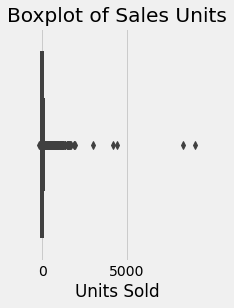

In [28]:
# Boxplot of sales
plt.subplot(1, 2, 2)
sns.boxplot(data['units'].dropna())
plt.title('Boxplot of Sales Units')
plt.xlabel('Units Sold')
plt.show()

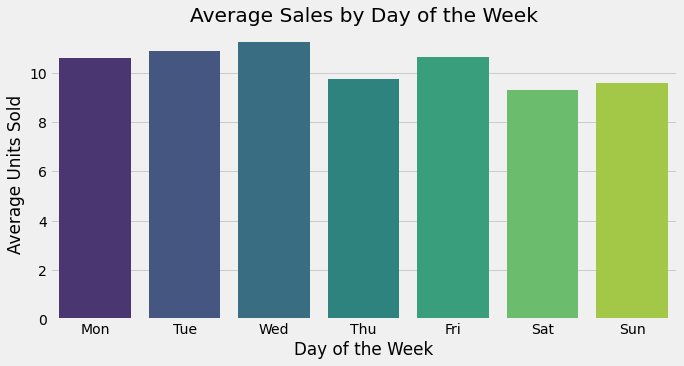

In [30]:
data['day_of_week'] = data['date'].dt.dayofweek
avg_sales_by_day = data.groupby('day_of_week')['units'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_sales_by_day.index, y=avg_sales_by_day.values, palette='viridis')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Units Sold')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

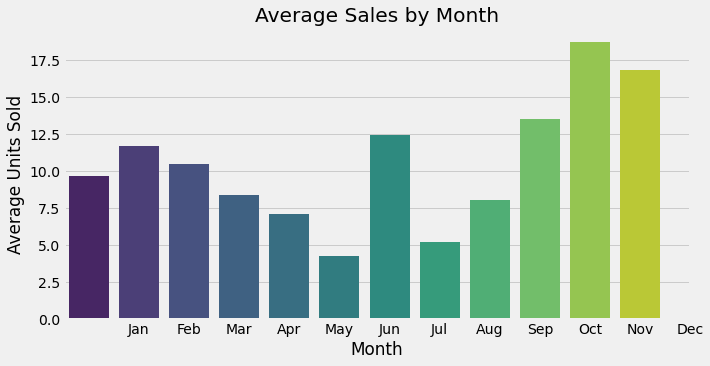

In [31]:
# EDA: Sales trends by month
data['month'] = data['date'].dt.month
avg_sales_by_month = data.groupby('month')['units'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_sales_by_month.index, y=avg_sales_by_month.values, palette='viridis')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Units Sold')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## Feature Engineering

In [51]:
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [17]:
# Create lag features and rolling statistics for the first item
item_data = data[data['Item Id'] == unique_item_ids[0]]
item_data.set_index('date', inplace=True)
item_data = item_data.resample('D').sum()

In [19]:
# Lag features
for lag in range(1, 8):
    item_data[f'lag_{lag}'] = item_data['units'].shift(lag)

# Rolling statistics
item_data['rolling_mean_7'] = item_data['units'].rolling(window=7).mean()
item_data['rolling_std_7'] = item_data['units'].rolling(window=7).std()

item_data = item_data.dropna()

# Display the engineered features
item_data.head()

,ad_spend,units,unit_price,day_of_week,month,year,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,rolling_std_7
date,,,,,,,,,,,,,,,
2022-04-26,0.0,0.0,0.0,1,4,2022,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.285714,7.559289e-01
2022-04-27,0.0,0.0,0.0,2,4,2022,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.285714,7.559289e-01
2022-04-28,0.0,0.0,0.0,3,4,2022,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,1.216675e-08
2022-04-29,0.0,0.0,0.0,4,4,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.216675e-08
2022-04-30,0.0,0.0,0.0,5,4,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.216675e-08


## Time Series Forcasting

In [55]:
from prophet import Prophet
df_model= data.reset_index()
df_model.head(1)

,index,ID,date,Item Id,Item Name,ad_spend,anarix_id,units,unit_price,day_of_week,month,year,week,day
0,0,2022-04-12_B09KDTS4DC,2022-04-12,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",NaN,NAPQUEEN,0.0,0.0,1,4,2022,15,12


In [77]:
df = pd.DataFrame()
df_model["ds"] = pd.to_datetime(df_model["date"])
df_model["y"] = df_model["unit_price"]

In [78]:
# model forcasting for 10 years
m = Prophet()
m.fit(df_model)
future = m.make_future_dataframe(periods=12 * 10,
freq="M")

15:22:53 - cmdstanpy - INFO - Chain [1] start processing
15:23:13 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
# creating future forcasting
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower",
"yhat_upper", "trend",
"trend_lower", "trend_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
896,2034-01-31,201.306925,-32037.143456,33917.155052,251.039153,-32048.231346,33897.296463
897,2034-02-28,236.422988,-32281.762584,33565.559773,251.877361,-32426.732575,34181.466876
898,2034-03-31,181.823288,-32680.310326,34231.835588,252.805378,-32899.203590,34419.466891
899,2034-04-30,223.283012,-33103.710029,34629.874256,253.703459,-33264.371680,34778.594450
900,2034-05-31,219.668465,-33426.457736,34607.701728,254.631476,-33520.535030,35109.410961


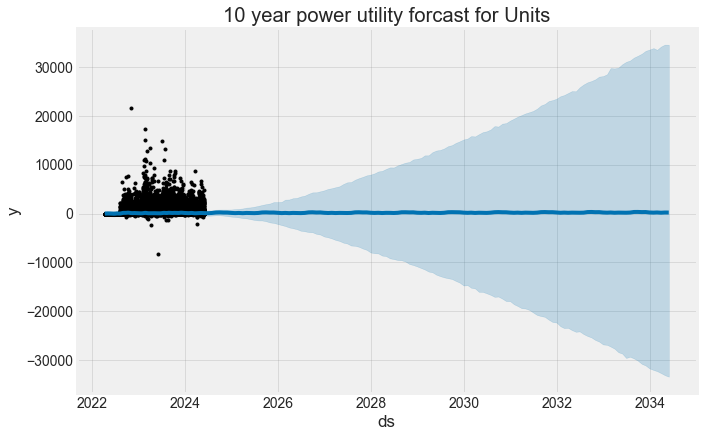

In [80]:
# plot style
style.use("fivethirtyeight")
# show plot
fig1 = m.plot(forecast)
plt.title("10 year power utility forcast for Units")
plt.show()


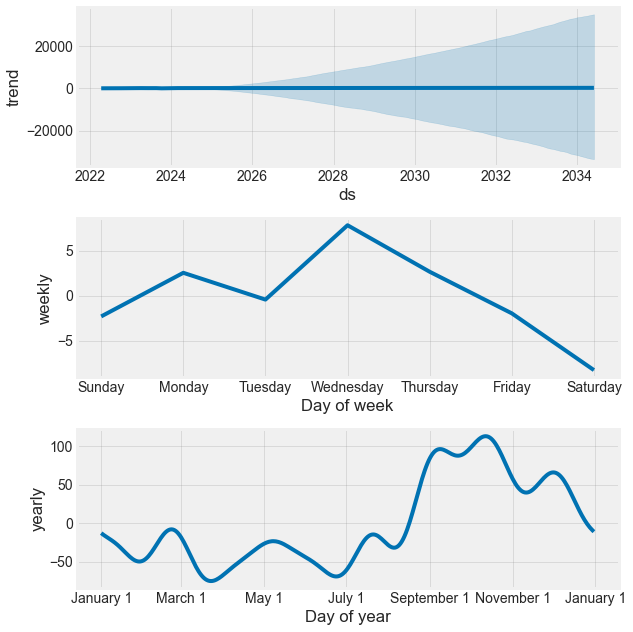

In [81]:
style.use("fivethirtyeight")
fig2 = m.plot_components(forecast)
# show plot
fig2=plt.show()
fig2

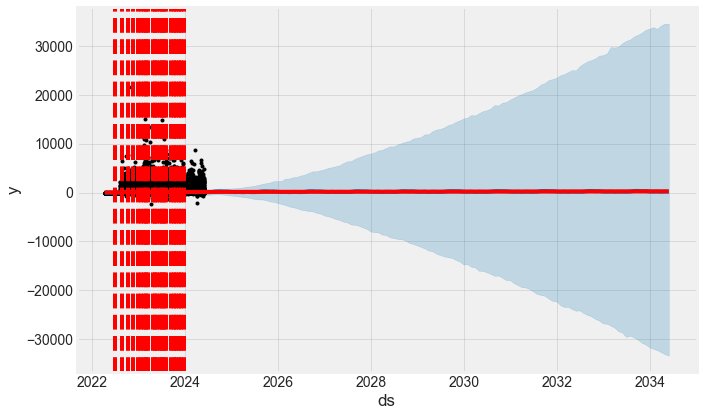

In [82]:
style.use("fivethirtyeight")
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),
m, forecast)
plt.show()

## Time Series Prediction

In [20]:
# Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [21]:
# Prepare the data for modeling
X = item_data.drop(columns=['units'])
y = item_data['units']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train a s Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.7595508496744427e-24


In [85]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

item_id = data['Item Id'].unique()[0]  # Change to the specific item ID you want to analyze

item_data = data[data['Item Id'] == item_id]

item_data.set_index('date', inplace=True)

train = item_data.iloc[:-30]
test = item_data.iloc[-30:]

train_units = train['units']
test_units = test['units']


### Fit the ARIMA model

In [86]:
# Fit the ARIMA model
model = ARIMA(train_units, order=(5, 1, 0))  # Adjust order (p, d, q) as necessary
model_fit = model.fit()


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [87]:
predictions = model_fit.forecast(steps=len(test_units))


In [88]:
mse = mean_squared_error(test_units, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3.0997320449515633


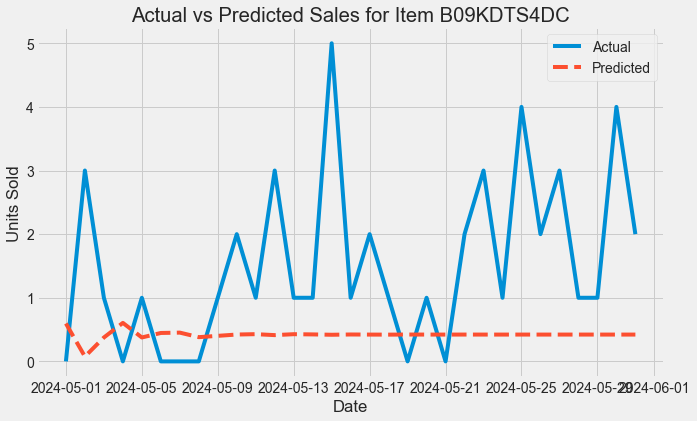

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(test_units.index, test_units, label='Actual')
plt.plot(test_units.index, predictions, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title(f'Actual vs Predicted Sales for Item {item_id}')
plt.legend()
plt.show()

### Prophet Model

In [90]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [100]:
data['date'] = pd.to_datetime(data['date'])

item_id = data['Item Id'].unique()[0]  # Change to the specific item ID you want to analyze

item_data = data[data['Item Id'] == item_id]

item_data = item_data[['date', 'units']].rename(columns={'date': 'ds', 'units': 'y'})

train = item_data.iloc[:-30]
test = item_data.iloc[-30:]

In [101]:
model = Prophet()
model.fit(train)


15:38:22 - cmdstanpy - INFO - Chain [1] start processing
15:38:23 - cmdstanpy - INFO - Chain [1] done processing
